### Import Libraries

In [150]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

### Load the Data

In [151]:
player = pd.read_csv("final_data.csv")

In [152]:
player.shape

(10754, 22)

In [153]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


### Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [154]:
# uniqeness
player.drop_duplicates(inplace=True)
player[player.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [155]:
# Completeness
player.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [156]:
# Accurecy types
player.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [157]:
# Accurecy - Outlier
# Convert categorical variables using OneHotEncoding

categorical_features = ['team']

numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards',
                    'second yellow cards','red cards', 'goals conceded','clean sheets',
                    'minutes played', 'days_injured','games_injured', 'award',
                    'current_value','highest_value','position_encoded',
                    'winger']

In [158]:
for i in categorical_features:
    print (player[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


In [159]:
for i in numeric_features:
    print (player[i].value_counts())

height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

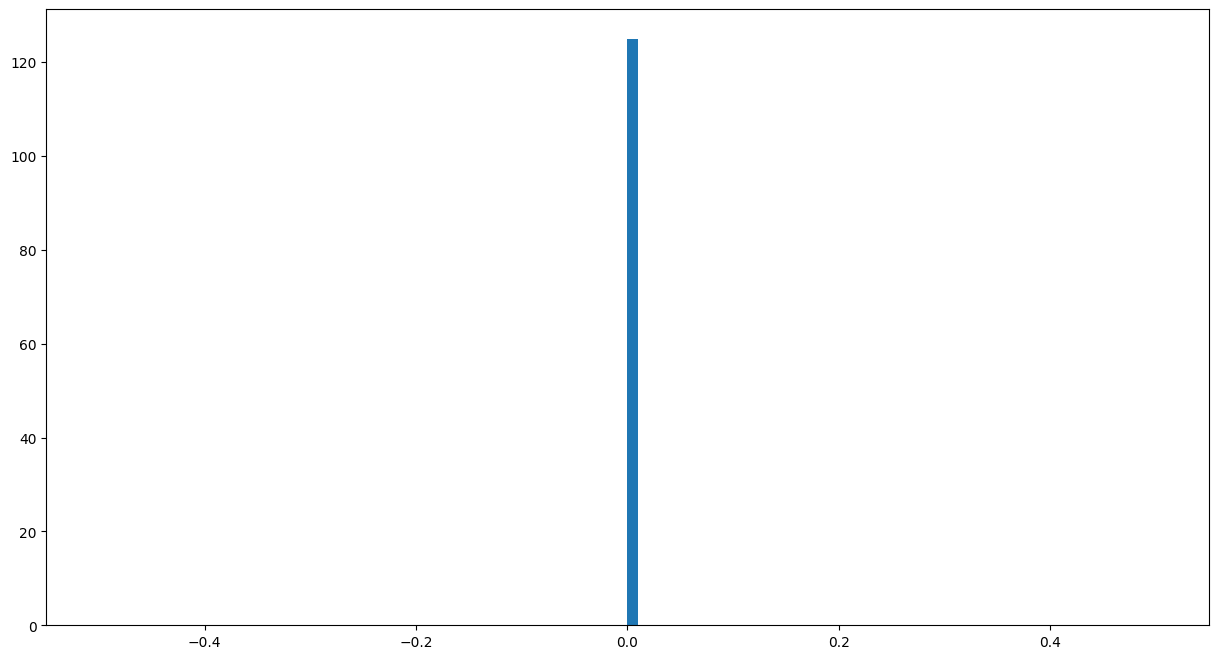

In [160]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['highest_value'])
plt.hist(player[player['highest_value']<=0.25]['highest_value'],bins=100);

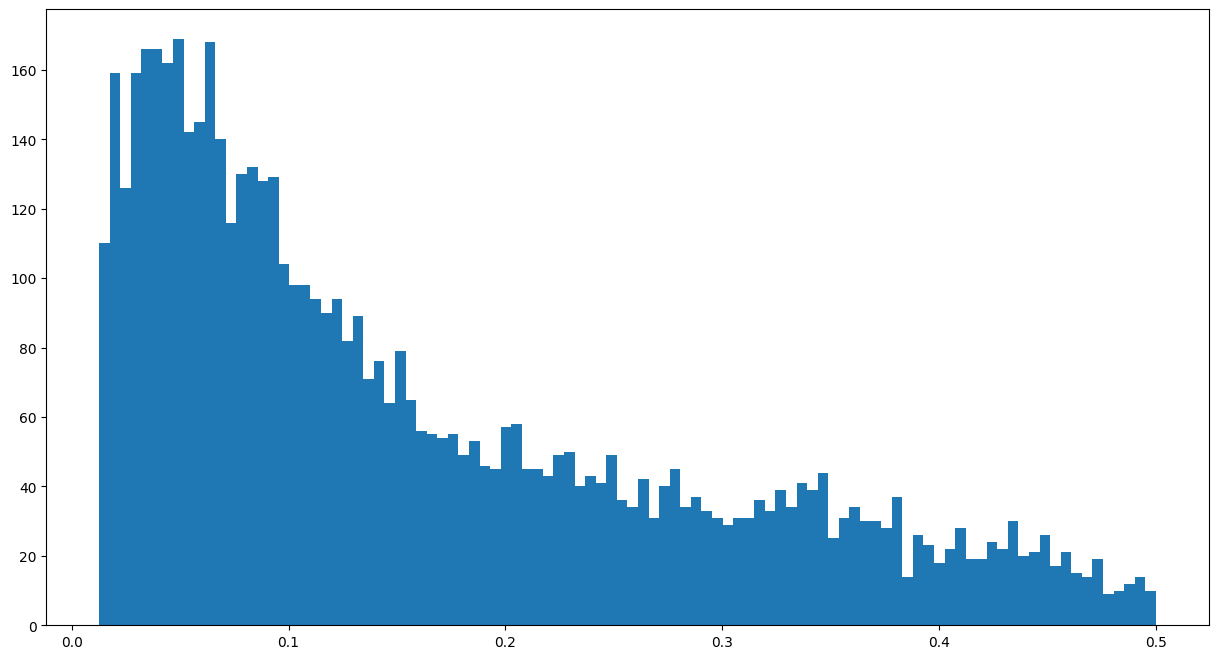

In [161]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['goals'])
plt.hist(player[(player['goals']<=0.5) & (player['goals']>0.0125)]['goals'], bins=100);

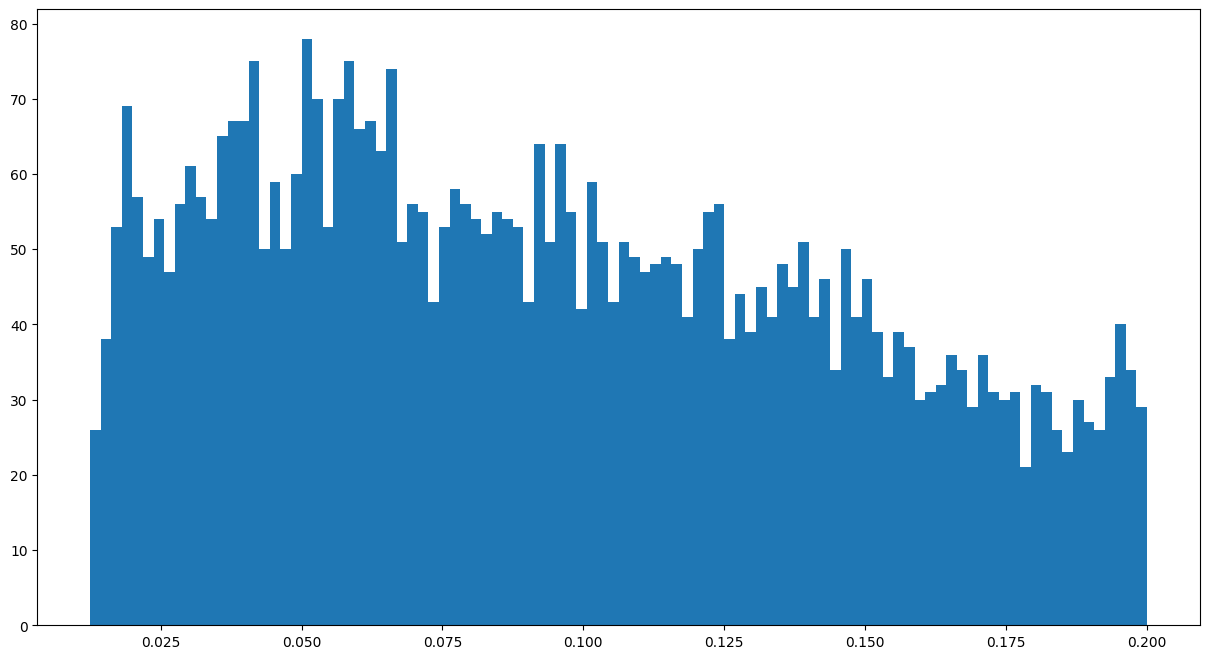

In [162]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['assists']);
plt.hist(player[(player['assists']<=0.2) & (player['assists']>0.0125)]['assists'],bins=100);

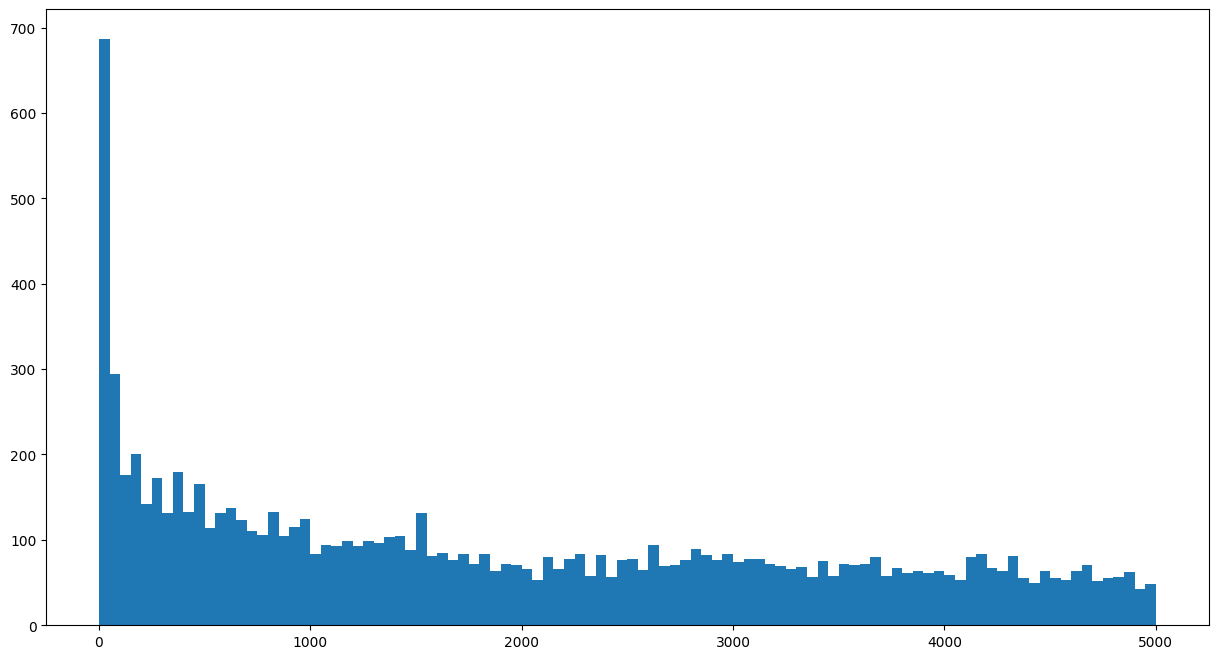

In [163]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['minutes played'])
plt.hist(player[player['minutes played']<=5000]['minutes played'],bins=100);

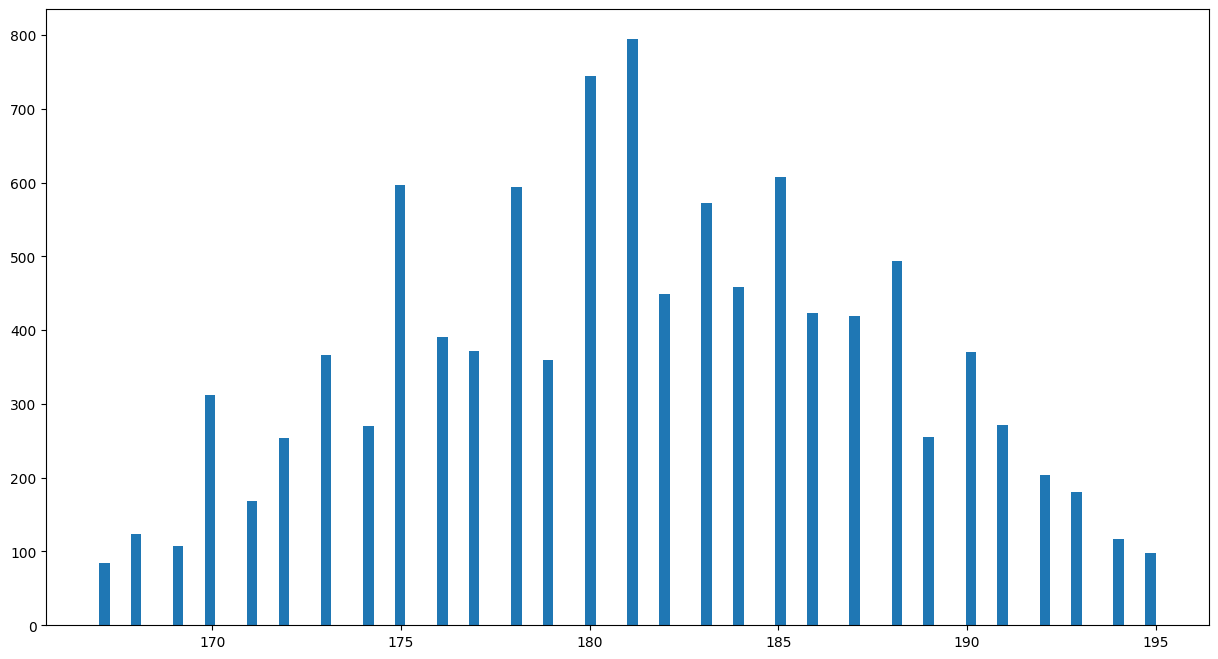

In [164]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['height'])
plt.hist(player[(player['height']<=195) & (player['height']>166)]['height'],bins=100);

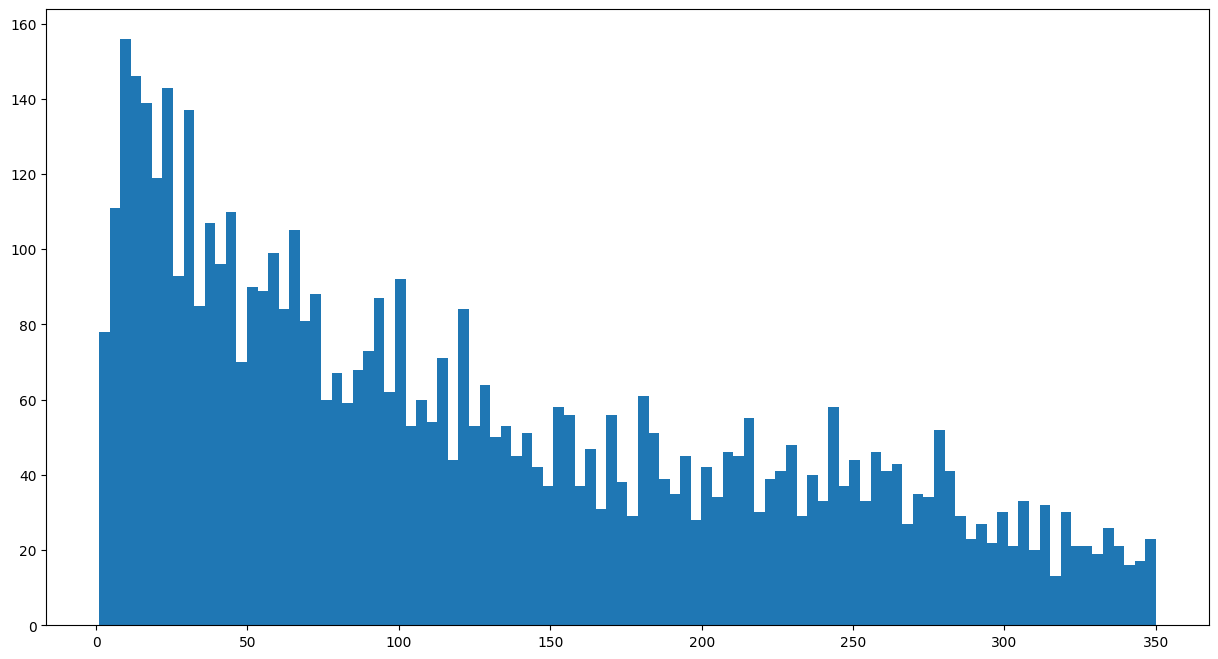

In [165]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['days_injured'])
plt.hist(player[(player['days_injured']<=350) & (player['days_injured']>0)]['days_injured'],bins=100);


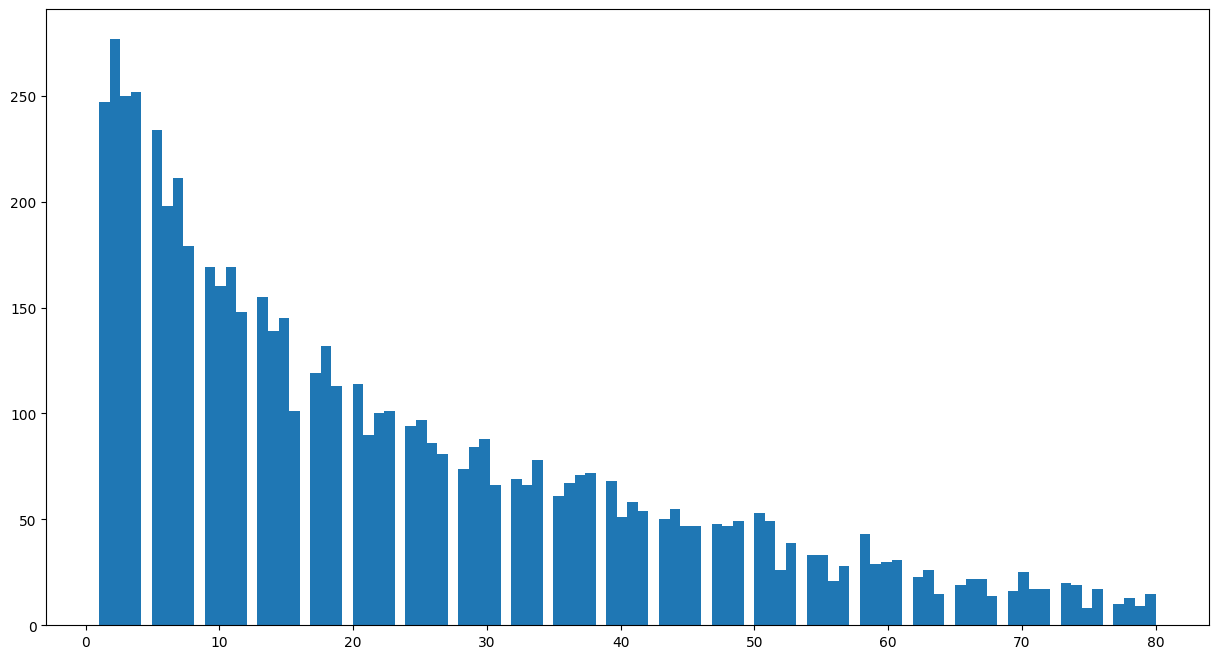

In [166]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['games_injured'])
plt.hist(player[(player['games_injured']<=80) & (player['games_injured']>0)]['games_injured'],bins=100);

#### 2. Feature engineering

1. Feature scaling

2. Aggregation

3. One hot coding

In [167]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [168]:
player.shape

(10754, 22)

In [169]:

player[["position"]].value_counts()

position                  
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

#### 3. Feature selection

In [170]:
player = player[['award', 'goals', 'position']]

In [171]:
player = pd.get_dummies(player, columns=['position'])

In [172]:
player.head()

,award,goals,position_Attack,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,13,0.000000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,0.000000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,4,0.000000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,9,0.028090,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,21,0.017889,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [173]:
player.shape

(10754, 18)

#### 4. Prepare train and test data

In [174]:
# Prepare data
X = player


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [175]:
X.shape

(10754, 18)

### Buliding the Model   

#### DBSCAN

In [176]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 15 #10 

In [177]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [178]:
distances[:,min_samples-1]

array([0.80133293, 0.        , 0.        , ..., 0.03023721, 0.02064808,
       0.        ])

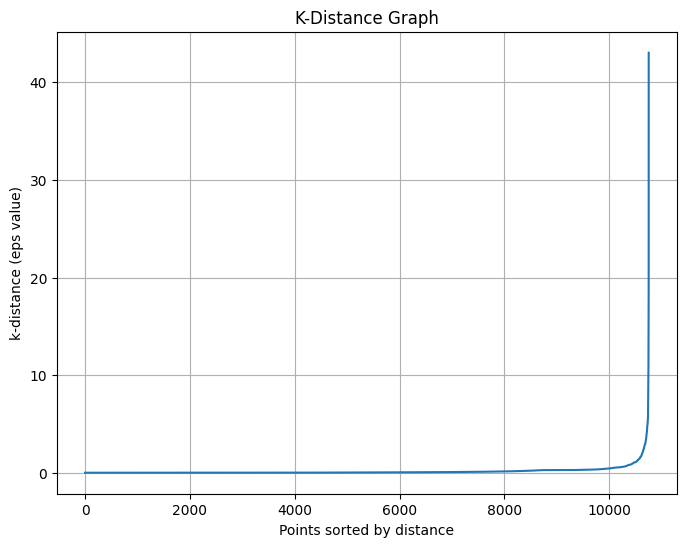

In [179]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [180]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 3 #2  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

### Train the Model

In [181]:
clusters = dbscan.fit_predict(X_scaled)

In [182]:
pd.Series(clusters).value_counts()

 1     1820
 9     1343
 0     1229
 5     1147
 4      899
 3      866
 2      807
 6      767
 8      715
 7      712
 10     102
 11     100
 13      74
 12      64
 14      52
 15      33
-1       24
Name: count, dtype: int64

### Evaluating the Model


In [183]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

-0.0943881975394291

In [184]:
X.head(2)

,award,goals,position_Attack,position_Attack Centre-Forward,position_Attack-LeftWinger,position_Attack-RightWinger,position_Attack-SecondStriker,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,13,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


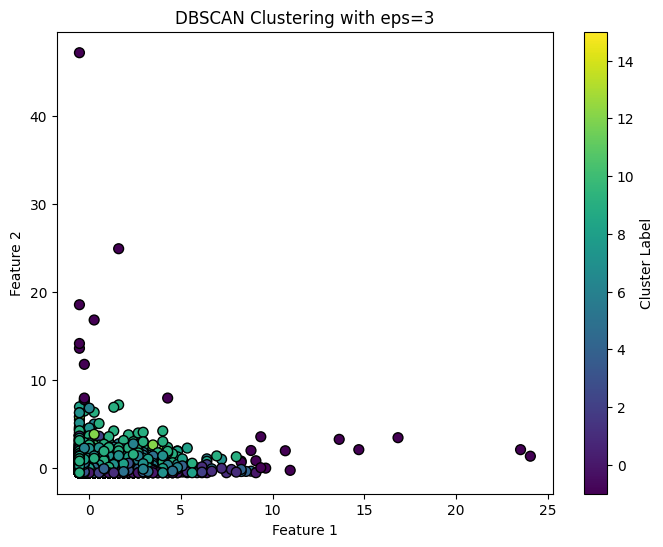

In [185]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [186]:
X['dbscan'] = clusters

In [187]:
X['dbscan'].value_counts()

dbscan
 1     1820
 9     1343
 0     1229
 5     1147
 4      899
 3      866
 2      807
 6      767
 8      715
 7      712
 10     102
 11     100
 13      74
 12      64
 14      52
 15      33
-1       24
Name: count, dtype: int64

<Axes: xlabel='award', ylabel='goals'>

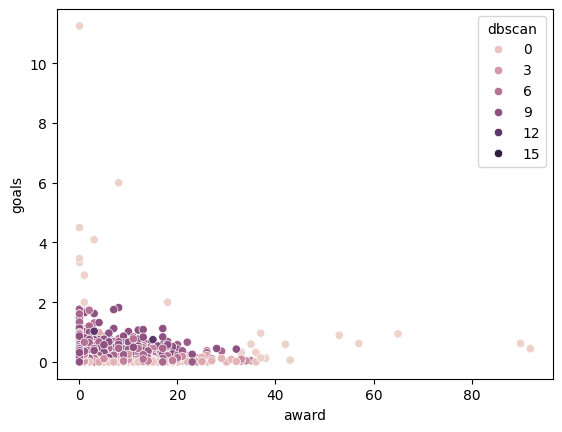

In [188]:
sns.scatterplot(data = X , x = 'award', y = 'goals', hue = 'dbscan')